In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)

**1.DATA LOADING AND UNDERSTANDING**

In [25]:
state_trx_user = pd.read_excel('/content/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='State_Txn and Users')
state_trx_type = pd.read_excel('/content/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name = 'State_TxnSplit')
state_device =pd.read_excel('/content/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='State_DeviceData')
state_district_user = pd.read_excel('/content/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name = 'District_Txn and Users')
district_demo = pd.read_excel('/content/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='District Demographics')


**1.1 LOAD EACH DATA AND DISPLAY ITS STRUCTURE**

In [26]:
# display  first five row of state_trx_user
state_trx_user.head(5)
#  display  bottom 10 row of state_trx_type
state_trx_type.tail(10)
#  display  10 row of state_device
state_device.head(10)
#  display first 10 row and last 10 row of state_district_user
state_district_user.head(10)
state_district_user.tail(10)
# display ever 10th row
district_demo.iloc[10::10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,"11,161.00",384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.00,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,"2,919.00",11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,"3,245.00",520,AS03,Barpeta
50,Assam,Dima Hasao,Haflong,213529,"4,888.00",44,AS13,Dima Hasao
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.00,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,"3,097.00",596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.00,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.00,14557,DL04,North


**1.2 DISPLAY BASIS STATISTIC AND DATA TYPE OF EACH DATASET**

In [27]:
# for each data set display the summary stastics for numerical column
state_trx_user.describe()
state_trx_type.describe()
state_device.describe()
state_district_user.describe()
district_demo.describe()
#  display the data type of each column of each dataset
state_trx_user.info()
state_trx_type.info()
state_device.info()
state_district_user.info()
district_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             504 non-null    object 
 1   Year              504 non-null    int64  
 2   Quarter           504 non-null    int64  
 3   Transactions      504 non-null    int64  
 4   Amount (INR)      503 non-null    float64
 5   ATV (INR)         504 non-null    float64
 6   Registered Users  504 non-null    int64  
 7   App Opens         504 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 31.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2514 non-null   object 
 1   Year              2514 non-null   int64  
 2   Quarter           2514 non-null   int64  
 3   Transaction Type 

**1.3 CHECK FOR MISSING VALUES**

---



In [28]:
#identify any missing values in Each dataset
state_trx_user.isnull().sum()
state_trx_type.isnull().sum()
state_device.isnull().sum()
state_district_user.isnull().sum()
district_demo.isnull().sum()
# Calculate the % of missing value for each column that has missing values
# highligh which columns of dataset has the highest % of missing values and how many
a = state_trx_user.isnull().sum().reset_index()
a['%missing'] = a.loc[:,0]/len(state_trx_user) * 100
a.rename(columns = {'index' : 'Columns', 0 : 'count Missing values'},inplace = True)
a.loc[a['%missing'].idxmax()]

b = state_trx_type.isnull().sum().reset_index()
b['%missing'] = b.loc[:,0]/len(state_trx_type) * 100
b.rename(columns = {'index' : 'Columns', 0 : 'count Missing values'},inplace = True)
b.loc[b['%missing'].idxmax()]

c = state_device.isnull().sum().reset_index()
c['%missing'] = c.loc[:,0]/len(state_device) * 100
c.rename(columns = {'index' : 'Columns', 0 : 'count Missing values'},inplace = True)
c.loc[c['%missing'].idxmax(),:]


d = state_district_user.isnull().sum().reset_index()
d.rename(columns = {'index' : 'Columns' , 0 : 'count Missing Values'},inplace  = True)
d['%missing'] = d.loc[:,['count Missing Values']] / state_district_user.shape[0] * 100
d = d[d['%missing'] > 0]
d.loc[d['%missing'].idxmax(),:]

e = district_demo.isnull().sum().reset_index()
e.rename(columns = {'index' : 'Columns' , 0 : 'count Missing Values'},inplace  = True)
e['%missing'] = e.loc[:,['count Missing Values']] / district_demo.shape[0] * 100
e = e[e['%missing'] > 0]










**1.4 CREATE A SUMMARY**

In [29]:
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo
# Calculate the Total no of State and total no of District
len(state_district_user['State'].unique())
len(state_district_user['District'].unique())
#Identity the State which has Highest number Districts
Count_of_District_per_State = state_district_user.groupby(['State'])['District'].count().reset_index()
Count_of_District_per_State.rename(columns = {'District' : 'District_count'},inplace = True)
Count_of_District_per_State.sort_values(by=['District_count'] , ascending = [0], inplace = True)
Count_of_District_per_State.reset_index(inplace = True, drop='index')
Count_of_District_per_State.loc[0,:]


,0
State,Uttar Pradesh
District_count,1050


**EXPLORATORY DATA ANALYSIS (EDA)**

2.1 ANALYSY TRANSACTION TREND OVER THE PERIOD OF EACH STATE

In [30]:
# calculate the total number of transactions and total transaction amount for each state over the year.
# Display the results in a tabular Format

state_trx_user.head()
state_year_transactions_summary = state_trx_user.groupby(['State', 'Year']).agg(
    Total_Transactions=('Transactions', 'sum'),
    Total_Amount=('Amount (INR)', 'sum')
).reset_index()
state_year_transactions_summary.sort_values(by=['State','Year'],ascending=[1,1])
state_year_transactions_summary

# identify the top 5 States with the Highest transaction volumns and the top 5 states with the lowest
# transaction volumes
state_transactions_summary= state_trx_user.groupby(['State'])['Transactions'].apply('sum').reset_index()
state_transactions_summary = state_transactions_summary.sort_values(by=['Transactions'],ascending = [1]).reset_index(drop = 'index')
state_transactions_summary.head(5)
state_transactions_summary.tail(5)
# INSIGHNT
# high transaction volume of trxn. = more app open
# helpful for finding city for any kind of compaign
# low trnx vol. -> less time spend on app -> giving them exiting vouchers

# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo

,State,Transactions
31,Rajasthan,1382918930
32,Andhra Pradesh,1781091169
33,Telangana,2347430243
34,Maharashtra,2833670154
35,Karnataka,2981044533


2.2 INDENTIFY MOST COMMON TRANSACTION TYPE IN STATE AND IN QUATOR

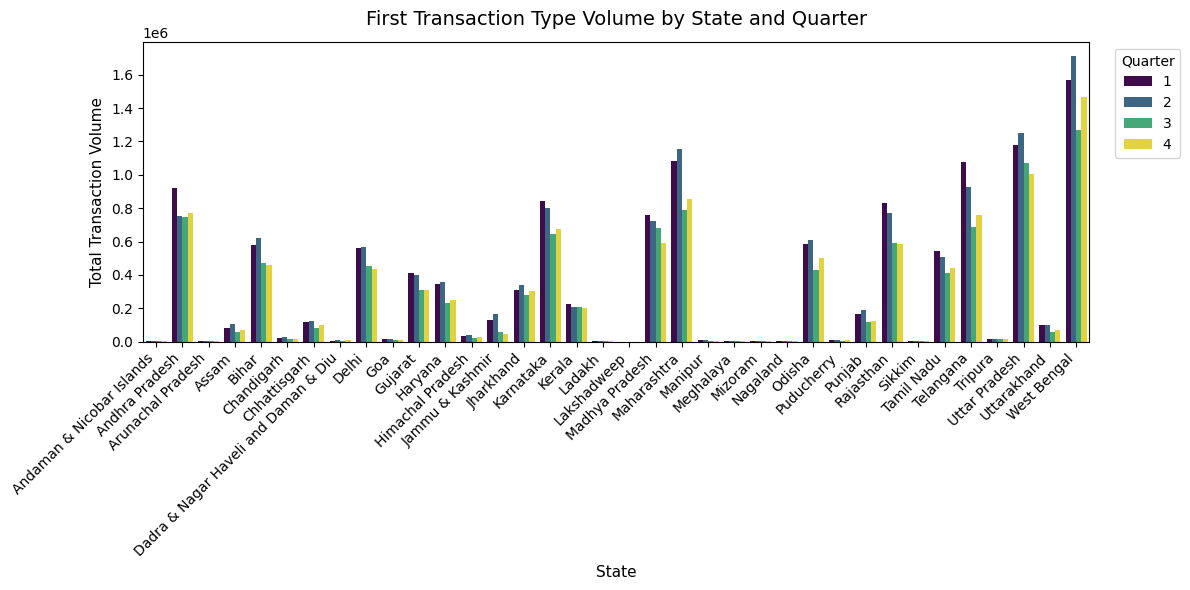

In [31]:
# for each state and quarter determine the most frequent transictions type
# display the result in tabular format
a = state_trx_type.groupby(['State','Quarter','Transaction Type']).agg(
    Total_transaction_type = ('Transactions', 'sum')
).reset_index()
a = a.sort_values(by = ['State','Quarter','Total_transaction_type'],ascending=[1,1,1]).reset_index().drop(columns = ['index'])
a = a.drop_duplicates(subset = ['State','Quarter'] , keep = 'first').reset_index().drop(columns = ['index'])
# a.tail(50)
plt.figure(figsize=(12,6))
sns.barplot(
    data=a,
    x='State',
    y='Total_transaction_type',
    hue='Quarter',
    palette='viridis'
)

plt.title('First Transaction Type Volume by State and Quarter', fontsize=14, pad=12)
plt.xlabel('State', fontsize=11)
plt.ylabel('Total Transaction Volume', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quarter', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# state_trx_type
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo

2.3 DETERMINE THE DEVICE BRAND WITH THE HIGHEST NO. OF CUSTOMER IN EACH CITY

In [32]:

#identify the device brand with the highest number of register in each state
Highest_brand_each_state = state_device.groupby(['State','Brand']).agg(
    Count_user_using_this_brand = ('Registered Users','sum')
).reset_index()
Highest_brand_each_state = Highest_brand_each_state.sort_values(by=['State','Count_user_using_this_brand'],ascending = [1,0]).reset_index().drop(columns = 'index')
Highest_brand_each_state = Highest_brand_each_state.drop_duplicates(subset='State', keep='first')
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo

**2.4 CREATE A LIST OF TOP DISTRICT PER STATE BASED ON POPULATION**

In [33]:
# for each state identify the district with the highest population.
# display the result in tabular format.
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo
a = district_demo.groupby(['State','District']).agg(
    total_population = ('Population','sum')
).reset_index()
a = a.sort_values(by = ['State','total_population'],ascending = [1,0]).reset_index().drop(columns = ['index'])
a = a.drop_duplicates(subset = 'State' , keep = 'first').reset_index().drop(columns = ['index'])
# create a column chart depecting the district with highest population of Each State

**2.5 Calculate the average transaction Value ATV for Each State**

In [34]:
# compute the average Transaction value ATV for each State
state_trx_user.groupby(['State'])['ATV (INR)'].mean().reset_index()

# identify the top 5 states with the highest ATV and the top 5 State with the lowest ATV.
a = state_trx_user.groupby(['State'])['ATV (INR)'].sum().reset_index()
a = a.sort_values(by = ['ATV (INR)'], ascending = [1]).reset_index().drop(columns = ['index'])
# top 5 Highest ATV
a.tail(5)
#top 5 lowest ATV
a.head(5)


,State,ATV (INR)
0,West Bengal,"19,230.41"
1,Odisha,"19,993.92"
2,Dadra & Nagar Haveli and Daman & Diu,"20,823.54"
3,Maharashtra,"21,229.07"
4,Karnataka,"21,243.49"


2.6 ANALYSE APP USAGE TREND

In [35]:
#calculate the total number of app opens over the years and quarters for each state.display in tablur format
#  year_Wise_app_open
year_Wise_app_open = state_trx_user.groupby(['State','Year'])['App Opens'].sum().reset_index()
year_Wise_app_open = year_Wise_app_open.sort_values(by =['State','Year','App Opens'],ascending = [1,1,0])
# quarter_wise_app_open
quarter_wise_app_open = quarter_wise_app_open = state_trx_user.groupby(['State','Quarter'])['App Opens'].sum().reset_index()
quarter_wise_app_open
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo

,State,Quarter,App Opens
0,Andaman & Nicobar Islands,1,1197922
1,Andaman & Nicobar Islands,2,2605935
2,Andaman & Nicobar Islands,3,686672
3,Andaman & Nicobar Islands,4,1064220
4,Andhra Pradesh,1,1444223220
...,...,...,...
139,Uttarakhand,4,81418755
140,West Bengal,1,523900892
141,West Bengal,2,523444999
142,West Bengal,3,423113842


2.7 DISTRIBUTION OF TRANSACTION TYPE

In [36]:
# create a bar chart showing the distribution of different transaction types for each state for the most Recent Quarter


2.8 FIND UNIQUE MAPPING BETWEEN DISTRICT NAME AND DISTRICT CODE

In [37]:

# identify the unique mapping between district name and district code from the dataset
District_and_code = state_district_user.loc[:,['District','Code']]
District_and_code =District_and_code.drop_duplicates().reset_index().drop(columns = ['index'])
District_and_code
District_and_code.to_csv("District_and_csv",index = False)
#create a CSV file
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo


***DATA QUALITY CHECK***

3.1 ENSURE DATA CONSISTENCY ACROSS STATE AND DISTRICT LEVEL

In [38]:
#for Each State , total number of transaction ,total transaction amount ,
# and total registered usersby summing up the value from the district level data
state_summary_districtWise = state_district_user.groupby(['State']).agg(
 total_Number_of_transaction = ('Transactions','sum'),
 Total_Transaction_amount = ('Amount (INR)','sum'),
 Total_number_of_users = ('Registered Users', 'sum')
).reset_index()

state_summary_stateWise = state_trx_user.groupby(['State']).agg(
total_Number_of_transaction = ('Transactions','sum'),
 Total_Transaction_amount = ('Amount (INR)','sum'),
 Total_number_of_users = ('Registered Users', 'sum')
).reset_index()

comparison = pd.merge(
    state_summary_districtWise,
    state_summary_stateWise,
    on='State',
    suffixes=('_district', '_state')
)
comparison['Diff_transaction'] = comparison['total_Number_of_transaction_district'] - comparison['total_Number_of_transaction_state']
comparison['Diff_amount'] = comparison['Total_Transaction_amount_district'] - comparison['Total_Transaction_amount_state']
comparison['Diff_users'] = comparison['Total_number_of_users_district']-comparison['Total_number_of_users_state']

discripancy = comparison[(comparison['Diff_transaction']!=0) | (comparison['Diff_amount'] != 0) | (comparison['Diff_amount']!=0)].replace(-0.0 , 0.0)
discripancy
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo


,State,total_Number_of_transaction_district,Total_Transaction_amount_district,Total_number_of_users_district,total_Number_of_transaction_state,Total_Transaction_amount_state,Total_number_of_users_state,Diff_transaction,Diff_amount,Diff_users
0,Andaman & Nicobar Islands,1223565,"3,641,817,860.75",408396,1223565,"3,641,817,860.75",408396,0,0.00,0
1,Andhra Pradesh,1781091169,"3,860,292,139,028.12",158007957,1781091169,"3,187,847,468,851.51",158007957,0,"672,444,670,176.61",0
2,Arunachal Pradesh,8043799,"22,251,830,956.91",1862214,8043799,"22,251,830,956.91",1862214,0,-0.00,0
3,Assam,123577981,"281,408,712,657.44",26860751,123577981,"281,408,712,657.44",26860751,0,0.00,0
4,Bihar,713643889,"1,639,578,926,751.51",115284760,713643889,"1,639,578,926,751.51",115284760,0,0.00,0
5,Chandigarh,25516542,"53,712,084,630.82",3801466,25516542,"53,712,084,630.82",3801466,0,0.00,0
6,Chhattisgarh,241908549,"415,635,319,208.15",37448388,241908549,"415,635,319,208.15",37448388,0,-0.00,0
7,Dadra & Nagar Haveli and Daman & Diu,12462185,"18,658,784,568.34",2701112,12462185,"18,658,784,568.34",2701112,0,0.00,0
8,Delhi,1011031124,"1,649,942,211,116.08",95374654,1011031124,"1,649,942,211,116.08",95374654,0,0.00,0
9,Goa,24481604,"44,271,871,113.09",4755320,24481604,"44,271,871,113.09",4755320,0,-0.00,0


**4. DATA MERGING AND ADVANCE ANALYTICS**

4.1 Ratio of users to population

                                   State  total_user_per_state  \
0              Andaman & Nicobar Islands               1225188   
1                         Andhra Pradesh            2054103441   
2                      Arunachal Pradesh              46555350   
3                                  Assam             913265534   
4                                  Bihar            4380820880   
5                             Chandigarh               3801466   
6                           Chhattisgarh            1048554864   
7   Dadra & Nagar Haveli and Daman & Diu               8103336   
8                                  Delhi            1049121194   
9                                    Goa               9510640   
10                               Gujarat            4170541056   
11                               Haryana            1882410618   
12                      Himachal Pradesh             160487760   
13                       Jammu & Kashmir             195128760   
14        

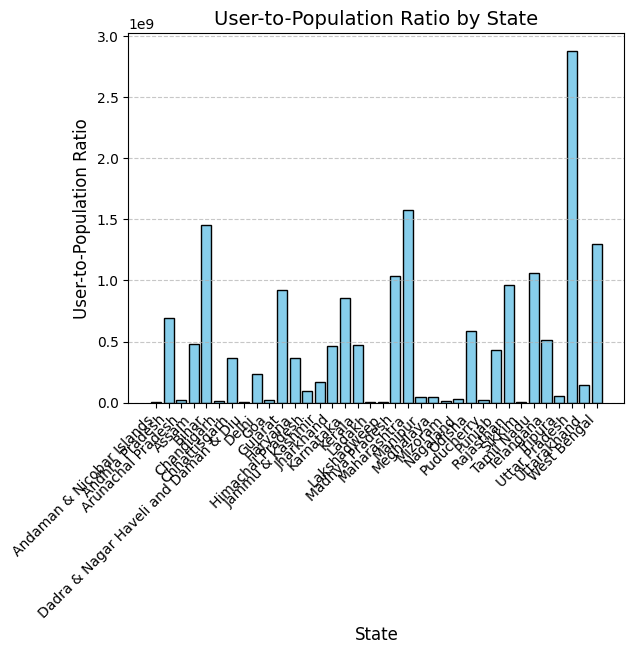

In [61]:

Transaction_And_Demographic = pd.merge(state_trx_user, district_demo, on='State')

# Calculate the total registered users and population for each state
Ratio_user_Statewise = Transaction_And_Demographic.groupby('State').agg(
    total_user_per_state=('Registered Users', 'sum'),
    total_population_per_state=('Population', 'sum')
).reset_index()

# Calculate the ratio of total registered users to total population
Ratio_user_Statewise['Ratio_per_city'] = (
    Ratio_user_Statewise['total_user_per_state'] /
    Ratio_user_Statewise['total_population_per_state']
)

# Display the DataFrame
print(Ratio_user_Statewise)

# Find the state with the smallest ratio
lowest_ratio_state = Ratio_user_Statewise.loc[
    Ratio_user_Statewise['Ratio_per_city'].idxmin(), :
]


# Create a column chart depicting the ratio of users to popularity by state.

import matplotlib.pyplot as plt
plt.bar(Ratio_user_Statewise['State'],
        Ratio_user_Statewise['total_population_per_state'],
        color='skyblue',
        edgecolor='black')
plt.xlabel('State', fontsize=12)
plt.ylabel('User-to-Population Ratio', fontsize=12)
plt.title('User-to-Population Ratio by State', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo


4.2 Correlate Population Density With Transaction volumn

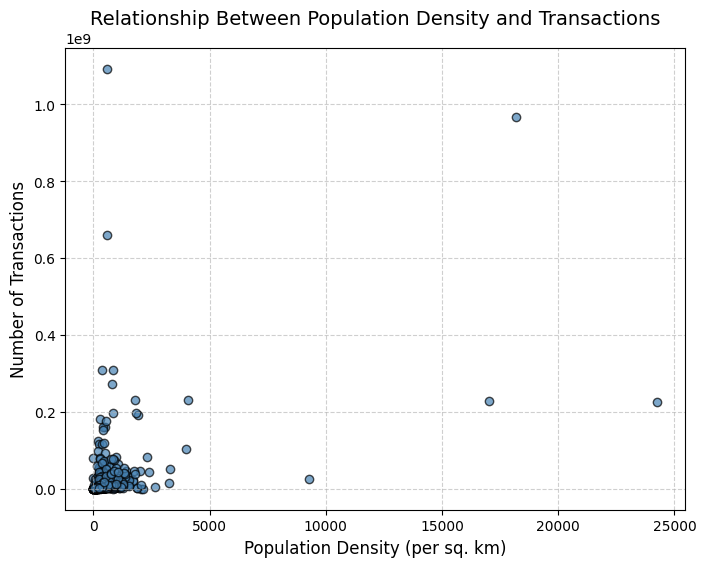

In [63]:
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo
# calculate the correlation between population density and transaction Volumn
a = state_district_user.groupby(['State','District'])['Transactions'].sum().reset_index()
merge_df = pd.merge(a,district_demo , how = 'inner',on = ['State','District'])
merge_df = merge_df[['State','District','Transactions','Density']]

# merge_df.isnull().sum()

# create a scatterplot to visualize the correlation between population density and transaction volumn
plt.figure(figsize=(8,6))
plt.scatter(
    merge_df['Density'],          # X-axis: Population Density
    merge_df['Transactions'],     # Y-axis: Transactions
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Population Density (per sq. km)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Relationship Between Population Density and Transactions', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




In [64]:
merge_df.head()

,State,District,Transactions,Density
0,Andaman & Nicobar Islands,South Andaman,1014784,89
1,Andhra Pradesh,Anantapur,124411535,213
2,Andhra Pradesh,Chittoor,181284289,275
3,Andhra Pradesh,East Godavari,160754836,477
4,Andhra Pradesh,Guntur,160872479,429


4.3 Average Transaction Amount Per User

In [41]:
# merge the relevant table and find the Avg.
# Transaction amount per user of Each State. result give in tabular format
a = state_trx_user.groupby(['State']).agg(
    total_amount = ('Amount (INR)' , 'sum'),
    total_Registered_Users = ('Registered Users','sum')
).reset_index()
a['Trans_Amount_per_user'] = a['total_amount']/a['total_Registered_Users']

a.head(5)
a.tail(5)

# print(14631761.22/6740)
# state_trx_type
# state_device
# state_district_user
# district_demo

,State,total_amount,total_Registered_Users,Trans_Amount_per_user
31,Telangana,"4,574,245,879,737.88",149224214,"30,653.51"
32,Tripura,"20,970,514,761.53",3661575,"5,727.18"
33,Uttar Pradesh,"2,399,757,104,087.38",246200404,"9,747.17"
34,Uttarakhand,"215,071,471,849.20",23792747,"9,039.37"
35,West Bengal,"1,452,706,824,854.87",144242183,"10,071.30"


4.4 Device brand usage ratio

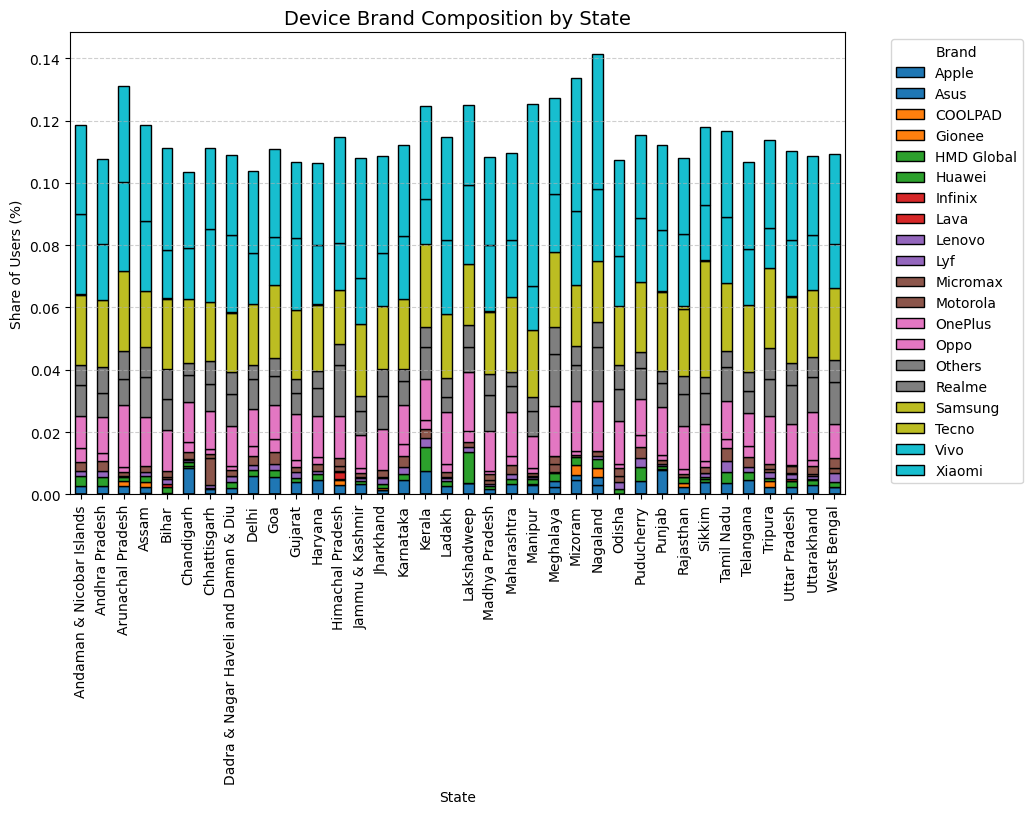

In [75]:
# merge the state device dataset with state transaction user dataset
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo

# calculate the ratio of users using each device brand to the total number of registered users in each State.
import pandas as pd
# 1️⃣ Merge and clean
a = pd.merge(state_trx_user, state_device, on='State', how='inner')
a = a.drop(columns=['Year_y','Quarter_y','App Opens','ATV (INR)','Amount (INR)','Transactions','Percentage'])
a = a.rename(columns={'Year_x':'Year','Quarter_x':'Quarter','Registered Users_x':'Registered_Users'})

# 2️⃣ Copy for separate aggregations
b = a.copy()

# 3️⃣ Total registered users per state-year
b = b.groupby(['State','Year'], as_index=False).agg(
    year_registered_user=('Registered_Users','sum')
)

# 4️⃣ Brand-wise registered users per state-year
a = a.groupby(['State','Year','Brand'], as_index=False).agg(
    brand_registered_user=('Registered Users_y','sum')
)

# 5️⃣ Merge both
State_Brand_ratio = pd.merge(a, b, on=['State','Year'], how='inner')

# 6️⃣ Calculate ratio
State_Brand_ratio['brand_to_state_ratio'] = (
    State_Brand_ratio['brand_registered_user'] / State_Brand_ratio['year_registered_user']
)
State_Brand_ratio

# create a bar chart depicting the device brand usage ratio for each state
import matplotlib.pyplot as plt

# Convert to wide format for plotting
pivot_df = State_Brand_ratio.pivot_table(
    index='State',
    columns='Brand',
    values='brand_to_state_ratio'
)

pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab10',
    edgecolor='black'
)

plt.title('Device Brand Composition by State', fontsize=14)
plt.xlabel('State')
plt.ylabel('Share of Users (%)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()








In [43]:
state_trx_user.groupby(['State','Year'])['Registered Users'].sum().reset_index()
# state_trx_type
# state_device
# state_district_user
# district_demo
# create a bar chart depicting the device brand usage ratio for each state.

,State,Year,Registered Users
0,Andaman & Nicobar Islands,2018,43516
1,Andaman & Nicobar Islands,2019,90218
2,Andaman & Nicobar Islands,2020,154809
3,Andaman & Nicobar Islands,2021,119853
4,Andhra Pradesh,2018,20024016
...,...,...,...
139,Uttarakhand,2021,5806162
140,West Bengal,2018,17569602
141,West Bengal,2019,36590500
142,West Bengal,2020,55293303


**5 DATA VISULAZATION**

5.1 Plot the total transaction and the amount over time for a select city

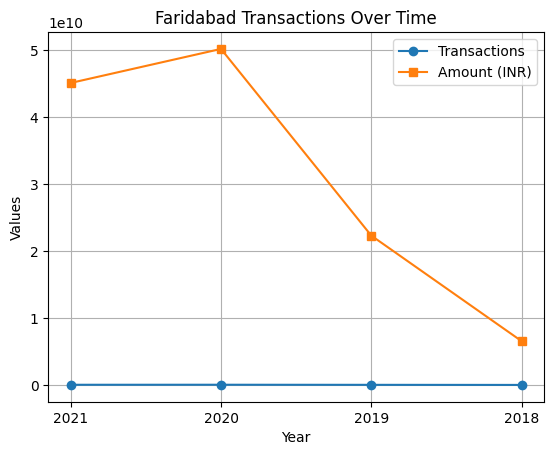

In [44]:
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# create a line chart showing the total number of transaction and total number of
# transaction amount over time(year and quarter)for select any selected city
a =state_district_user.groupby(['Year','District']).agg(
    total_transaction = ('Transactions','sum'),
    total_amount = ('Amount (INR)','sum')
).reset_index()
a = a.sort_values(by=['Year','total_transaction','total_amount'], ascending = [0,0,1])
a = a[a['District'] == 'Faridabad']
a['Period'] = a['Year'].astype(str)



plt.plot(a['Period'], a['total_transaction'], marker='o', label='Transactions')
plt.plot(a['Period'], a['total_amount'], marker='s', label='Amount (INR)')

plt.title('Faridabad Transactions Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# district_demo

5.2 Create a pie chart showing the distribution of different transactions types of a select State and quarter

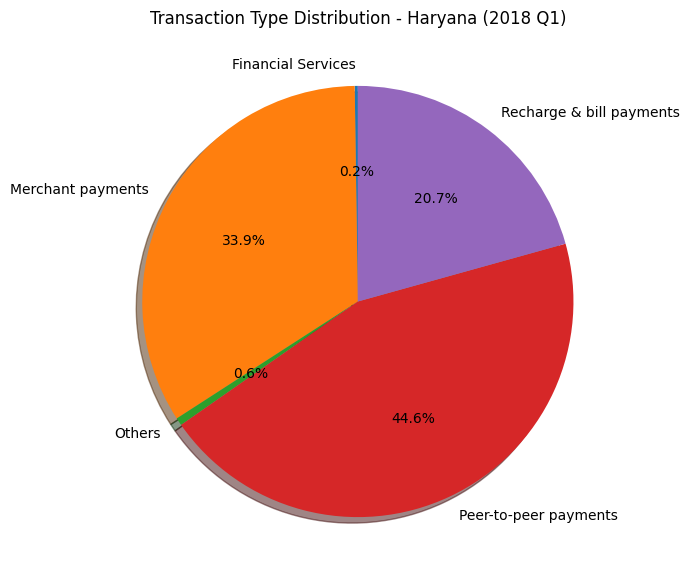

In [45]:
# state_trx_user
# state_trx_type
# state_device
# state_district_user
# district_demo
a = state_trx_type
b = state_trx_type
a = a.groupby(['Transaction Type'])['Transactions'].sum().reset_index()
b = b[['State','Year','Quarter','Transaction Type']]
c = pd.merge(b,a,on = 'Transaction Type' , how = 'inner')
c = c[(c['State'] == 'Haryana') & (c['Year'] == 2018) & (c['Quarter'] == 1)]

pie_data = c.groupby('Transaction Type')['Transactions'].sum()
plt.figure(figsize=(7,7))
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title('Transaction Type Distribution - Haryana (2018 Q1)')
plt.show()

**6 INSIGHT AND CONCLUSION**

In [76]:

# Transaction Trends
# High transaction states: Maharashtra, Karnataka, Tamil Nadu.
# Low transaction states: smaller or less engaged markets.
# Insight: Target high-volume states for premium campaigns, low-volume states for user acquisition.
# 2. Average Transaction Value (ATV)
# High ATV → affluent users / large transactions.
# Low ATV → mostly small-value peer-to-peer transactions.
# Insight: Helps forecast revenue and plan promotions.
# 3. User Base & App Adoption
# Ratio of registered users to population highlights penetration.
# States with low ratio = untapped markets.
# Device brand usage shows which devices dominate in each state.
# 4. District-Level Analysis
# Population density correlates with transactions.
# Top districts by population = key targets for campaigns.
# 5. Transaction Type Distribution
# Some transaction types dominate per state-quarter (e.g., UPI, Recharge).
# Insight: Prioritize features and incentives based on most-used services.
# 6. Data Quality
# Checked missing values and discrepancies.
# Insight: Ensures reliable analysis; highlights need for consistent reporting.
# Actionable Recommendations
# Focus marketing on low-penetration states.
# Optimize app for popular devices.
# Use high-volume / high-ATV states for revenue-driving campaigns.
# Monitor district-level adoption for micro-targeted strategies.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>